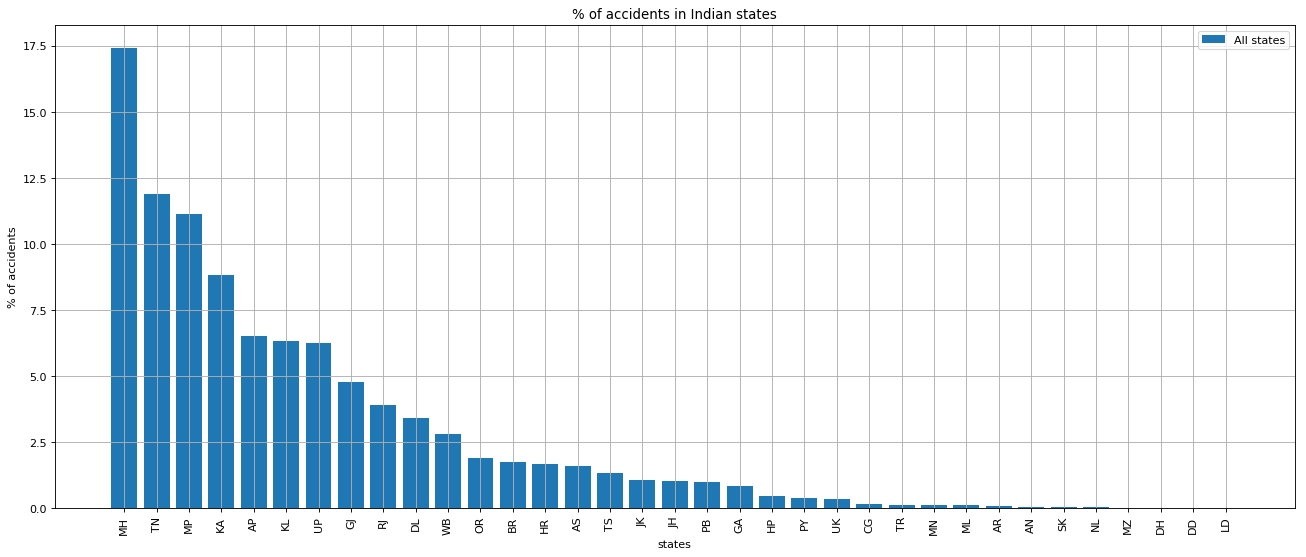

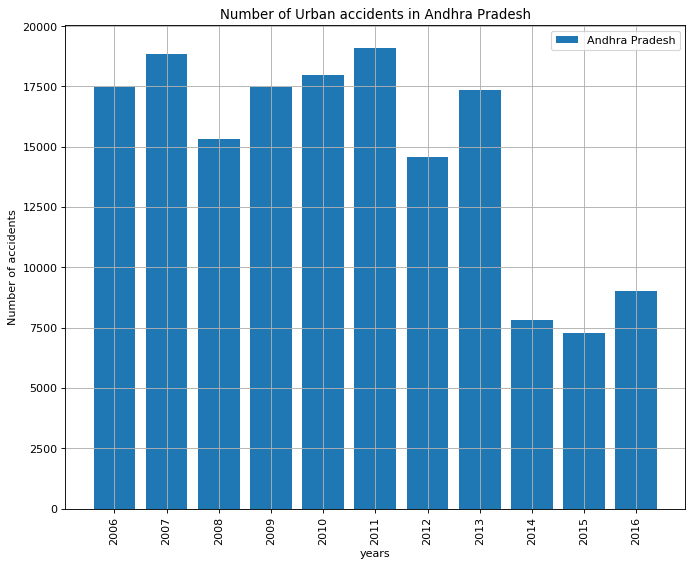

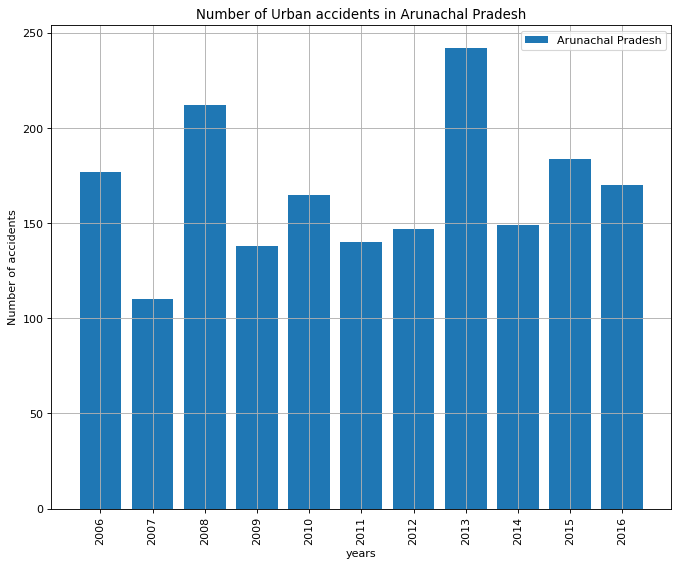

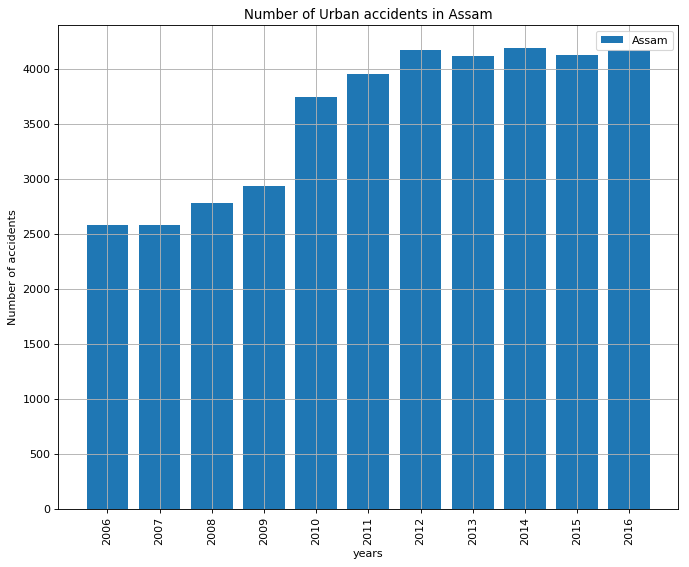

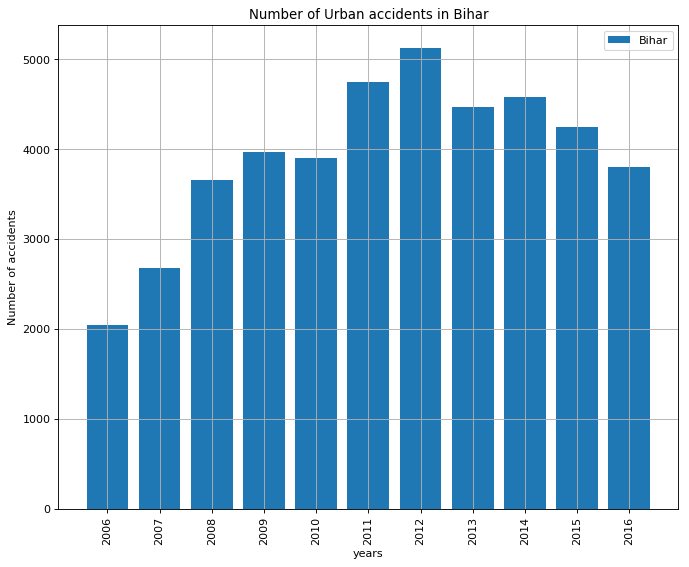

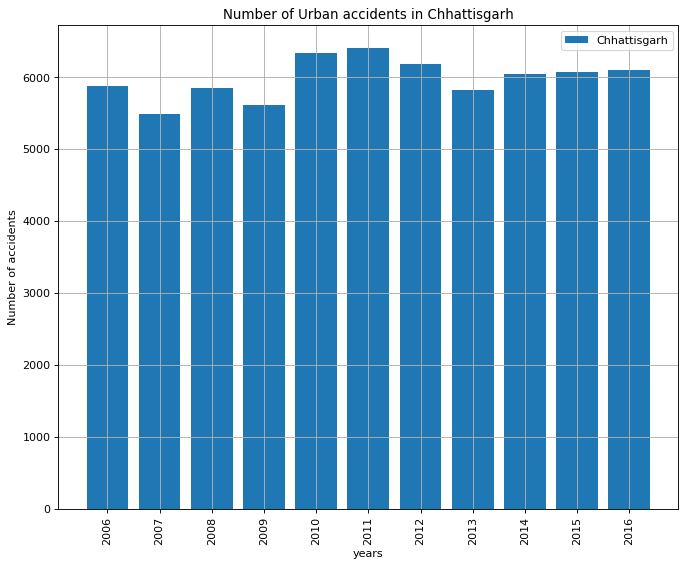

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

FILE_NAME = "Urban_Total_Accidents_2006-16.csv"

states_map = {'Andhra Pradesh': 'AP', 'Arunachal Pradesh': 'AR',
              'Assam': 'AS', 'Bihar': 'BR', 'Chhattisgarh': 'CG',
              'Goa': 'GA', 'Gujarat': 'GJ', 'Haryana': 'HR',
              'Himachal Pradesh': 'HP', 'Jammu & Kashmir': 'JK',
              'Jharkhand': 'JH', 'Karnataka': 'KA', 'Kerala': 'KL',
              'Madhya Pradesh': 'MP', 'Maharashtra': 'MH', 
              'Manipur': 'MN', 'Meghalaya': 'ML', 'Mizoram': 'MZ',
              'Nagaland': 'NL', 'Odisha': 'OR', 'Punjab': 'PB',
              'Rajasthan': 'RJ', 'Sikkim': 'SK', 'Tamil Nadu': 'TN',
              'Telangana': 'TS', 'Tripura': 'TR', 'Uttarakhand': 'UK',
              'Uttar Pradesh': 'UP', 'West Bengal': 'WB',
              'Andaman & Nicobar Islands': 'AN', 'Chandigarh': 'CG',
              'Dadra & Nagar Haveli': 'DH', 'Daman & Diu': 'DD', 
              'Delhi': 'DL', 'Lakshadweep': 'LD', 'Puducherry': 'PY'}

def percentage_of_accidents(states_data):
    states = dict()
    total = sum(states_data['All India'].values())
    for state, value in states_data.items():
        if state == 'All India':
            continue
        states[states_map[state]] = (sum(value.values()) * 100) / total
    
    states = dict(sorted(states.items(), key=lambda k: k[1], reverse=True))
    
    figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('% of accidents')
    plt.xlabel('states')
    plt.grid(True)
    plt.title(f"% of accidents in Indian states")
    x = tuple(states.keys())
    y = tuple(states.values())
    plt.bar(x, y, label='All states')
    plt.xticks(rotation='vertical')

        
    plt.legend()
    plt.show()    
    
def plot_state(state, x, y):
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Number of accidents')
    plt.xlabel('years')
    plt.grid(True)
    plt.title(f"Number of Urban accidents in {state}")
    
    x = tuple(x)
    y = tuple(y)
    plt.bar(x, y, label=state)
    plt.xticks(rotation='vertical')
        
    plt.legend()
    plt.show()
    
def convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        return 0
    
with open(FILE_NAME) as csv_file:
    states_dict = dict()
    headers = csv_file.readline().strip().split(',')[1:]
    for line in csv_file:
        row_data = line.strip().split(',')
        state = row_data[0]
        row_data = [convert_to_int(value) for value in row_data[1:]]
        states_dict[state] = {year: year_date for year, year_date in zip(headers, row_data)}
        
percentage_of_accidents(states_dict)

for state, data in states_dict.items():
    plot_state(state, data.keys(), data.values())